In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [5]:
directory = "/data/mrando/svrz_results/least_squares"

methods = [
    ('S-SZD' , f'{directory}/sszd.log'),
    ('SZVR-G' , f'{directory}/szvr_g.log'),
    # ('Spider-SZO' , f'{directory}/spider_szo.log'),
    # ('ZO-Spider-Coord' , f'{directory}/zo_spider_coord.log'),
    ('ZO-SVRG-Ave' , f'{directory}/zosvrg_ave.log'),
    ('ZO-SVRG-Coord' , f'{directory}/zosvrg_coord.log'),
    ('ZO-SVRG-Coord-Rand' , f'{directory}/zosvrg_coord_rand.log'),
    ('O-SVRZ' , f'{directory}/osvrz.log'),
]
budget = 1000000

def read_result(budget, path):
    mu_val, std_val = [], []
    mu_tim, std_tim = [], []
    with open(path, 'r') as f:
        for line in f.readlines():
            splitted = line.split(",")
            mu_val += [float(splitted[0]) for _ in range(int(splitted[-1]))]
            std_val += [float(splitted[1]) for _ in range(int(splitted[-1]))]
            mu_tim += [float(splitted[2]) for _ in range(int(splitted[-1]))]
            std_tim += [float(splitted[3]) for _ in range(int(splitted[-1]))]
            if len(mu_val) > budget:
                break
    mu_val, std_val = np.array(mu_val)[:budget], np.array(std_val)[:budget]
    mu_tim, std_tim = np.array(mu_tim)[:budget], np.array(std_tim)[:budget]
    return dict(values=(mu_val, std_val), times=(mu_tim, std_tim))


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title("Function values")
ax2.set_title("Cumulative Computational Cost")

for (label, path) in methods:
    ris = read_result(budget, path)
    mu_values, std_values = ris['values']
    mu_times,  std_times  = ris['times']
    
    ax1.plot(range(len(mu_values)), mu_values, '-', label=label)
    ax1.fill_between(range(len(mu_values)), mu_values - std_values, mu_values + std_values, alpha=0.6)
    ax2.plot(range(len(mu_times)), mu_times, '-', label=label)
    ax2.fill_between(range(len(mu_times)), mu_times - std_times, mu_times + std_times, alpha=0.6)
    ris = None

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.legend(loc='upper right')

ax1.set_xlabel("# stochastic function values", fontsize=12)
ax1.set_ylabel("$F(x^\\tau) - F(x^*)$", fontsize=12)

ax2.set_xlabel("# stochastic function values", fontsize=12)
ax2.set_ylabel("Cost (s)", fontsize=12)

fig.tight_layout()
fig.savefig("test.png", bbox_inches='tight')


In [6]:
d = 50
gammas = [1e-5, 1e-3, 1e-2, 1e-2, 1.0]#[0.0001, 0.0005, 0.001, 0.005]#, 0.01, 0.05, 0.1, 0.5]
inner_iters = [5, 25, 50]
num_directions = [1] + [i for i in range(5, d + 5, 5)]
gammas = np.logspace(-4, -1, 30)

out_dir = "./results/changing_gamma/"

opt_names = ['osvrz']


In [9]:
def read_results(path, l, m):
    results = {}
    for gamma in gammas:
        with open(f"{path}/{gamma}_{m}_{l}.log") as f:
            for line in f.readlines():
                splitted = line.split(",")
                name = splitted[0]
                f0 = float(splitted[1])
                f_T = float(splitted[2]) 
                f_c = float(splitted[3])
                f_T = f0 if f_T != f_T or f_T >= f0  else f_T 
                f_c = 1e-20 if f_T != f_T or f_c != f_c or  f_T >= f0  else f_c
                if name not in results:
                    results[name] = ([f_T], [f_c])
                else:
                    results[name][0].append(f_T)
                    results[name][1].append(f_c)
    return results
                    

In [34]:
num_directions = [1] + [i for i in range(10, d + 10, 10)]


results_25 = [read_results(out_dir, l, 25) for l in num_directions]
results_50 = [read_results(out_dir, l, 50) for l in num_directions]
results_75 = [read_results(out_dir, l, 75) for l in num_directions]

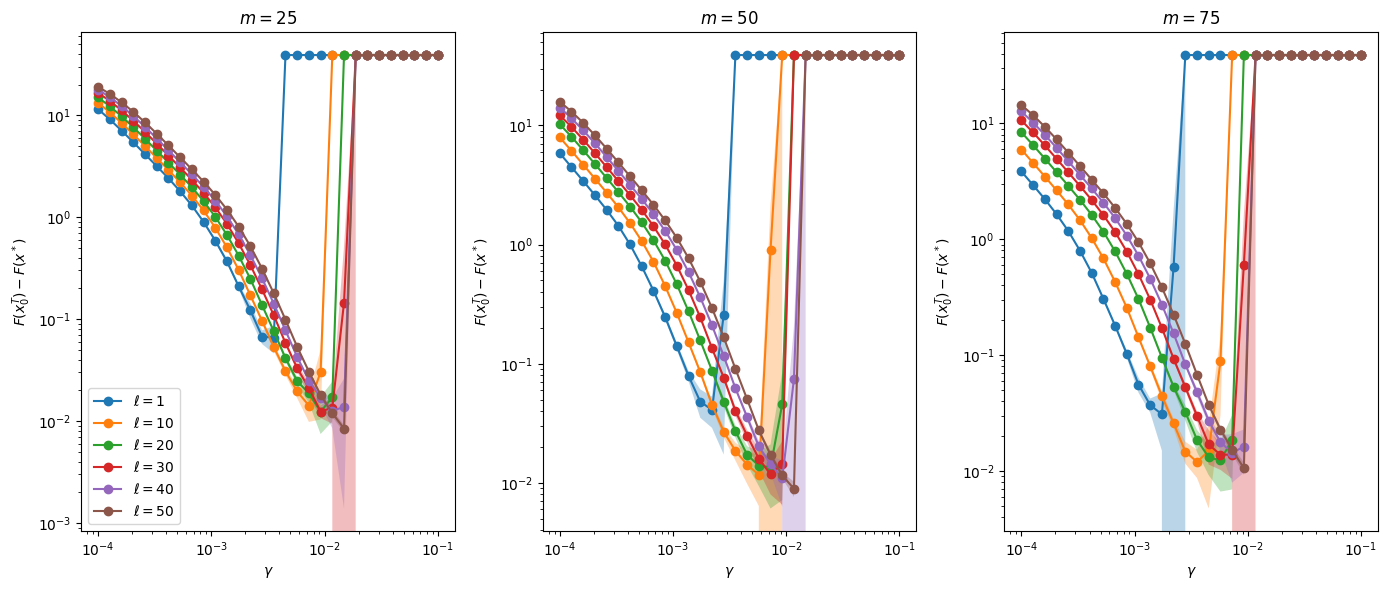

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
for (i, result) in enumerate(results_25):
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_50:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_75:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)


ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrg_changing_gamma.png", bbox_inches='tight')

In [31]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1,  10, 25, 50, 75]

results_zo_svrg_cr_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



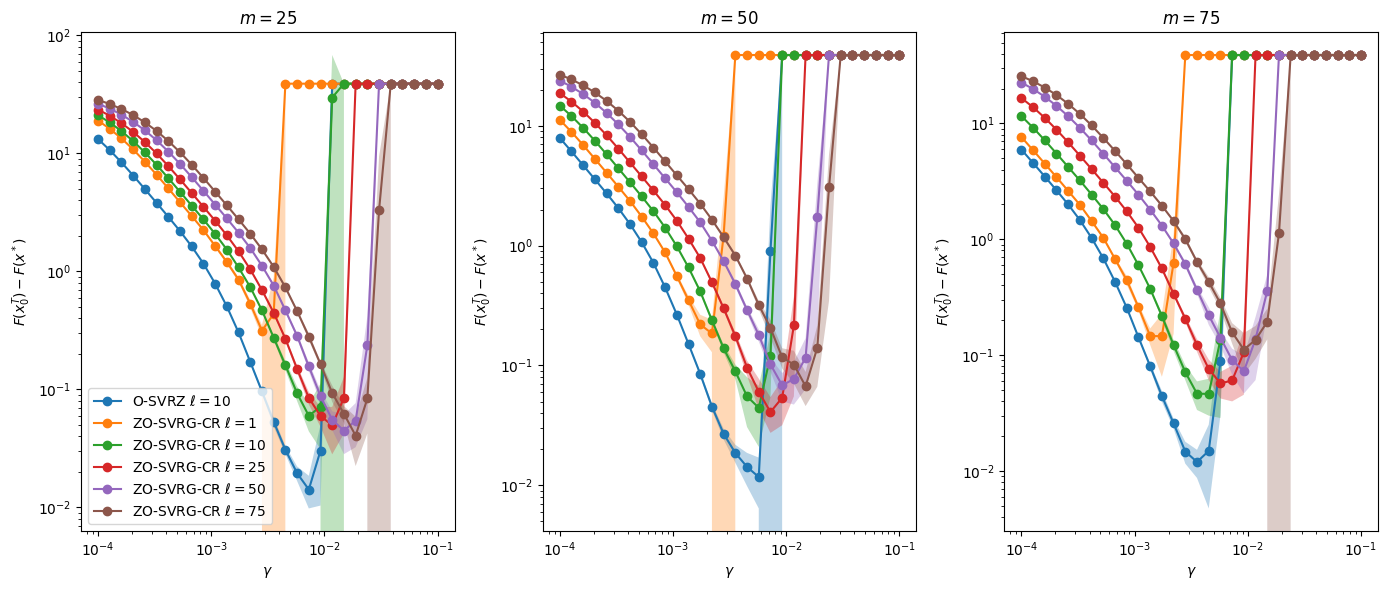

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_25):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zo_svrg_cr_50):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_75):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgcr_gamma.png", bbox_inches='tight')

# Comparison with SZRV-G

In [12]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_szrvg_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_szrvg_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_szrvg_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [13]:
len(results_szrvg_75[1]['szrv_g'][0]), len(gammas)

(30, 30)

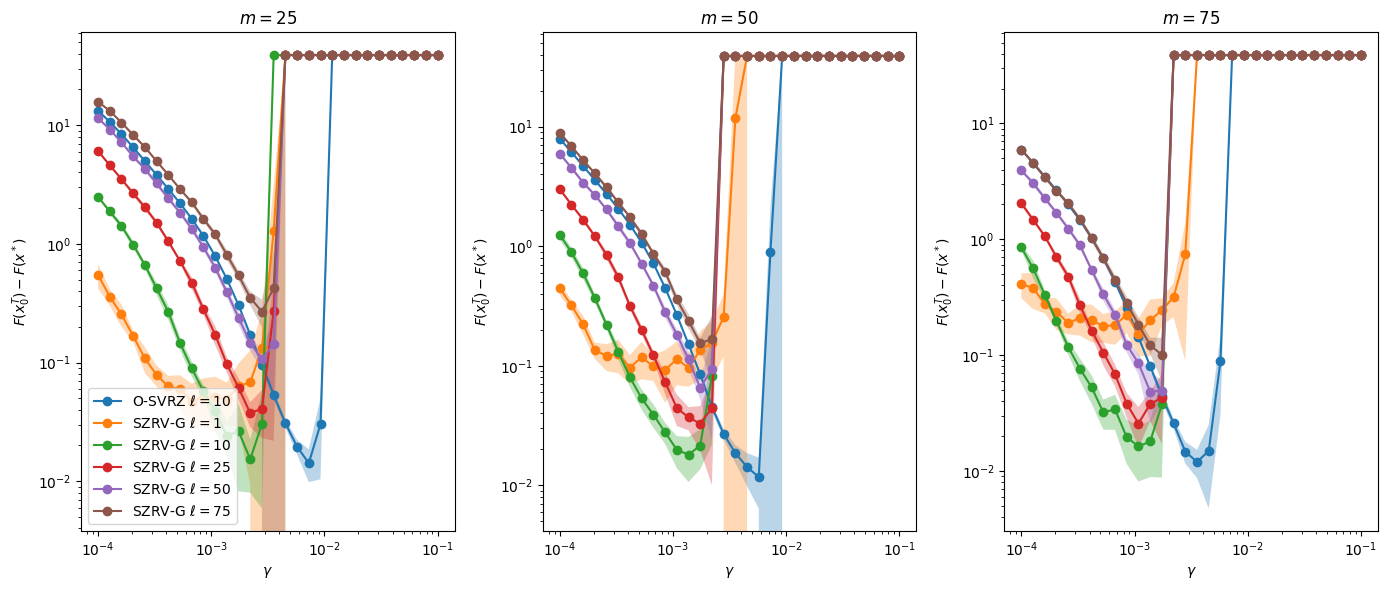

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_25):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_50):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_szrvg_75):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_szvrg.png", bbox_inches='tight')

# Comparison with ZO-SVRG-Ave

In [16]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_zosvrgave_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zosvrgave_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zosvrgave_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [17]:
len(results_zosvrgave_75[0]['zo_svrg_ave'][1]), len(gammas)

(30, 30)

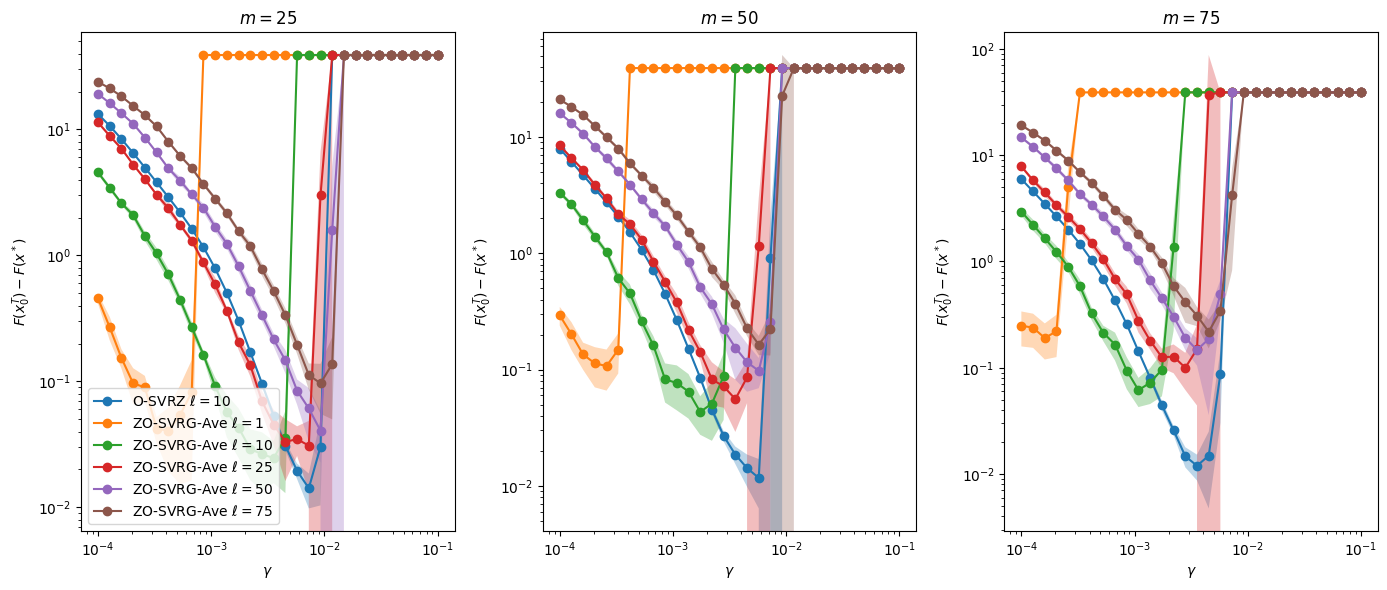

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_25):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_50):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zosvrgave_75):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgave_gamma.png", bbox_inches='tight')